In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
pd.set_option('display.max_columns', None)
print(np.shape(data))
print(data.describe())

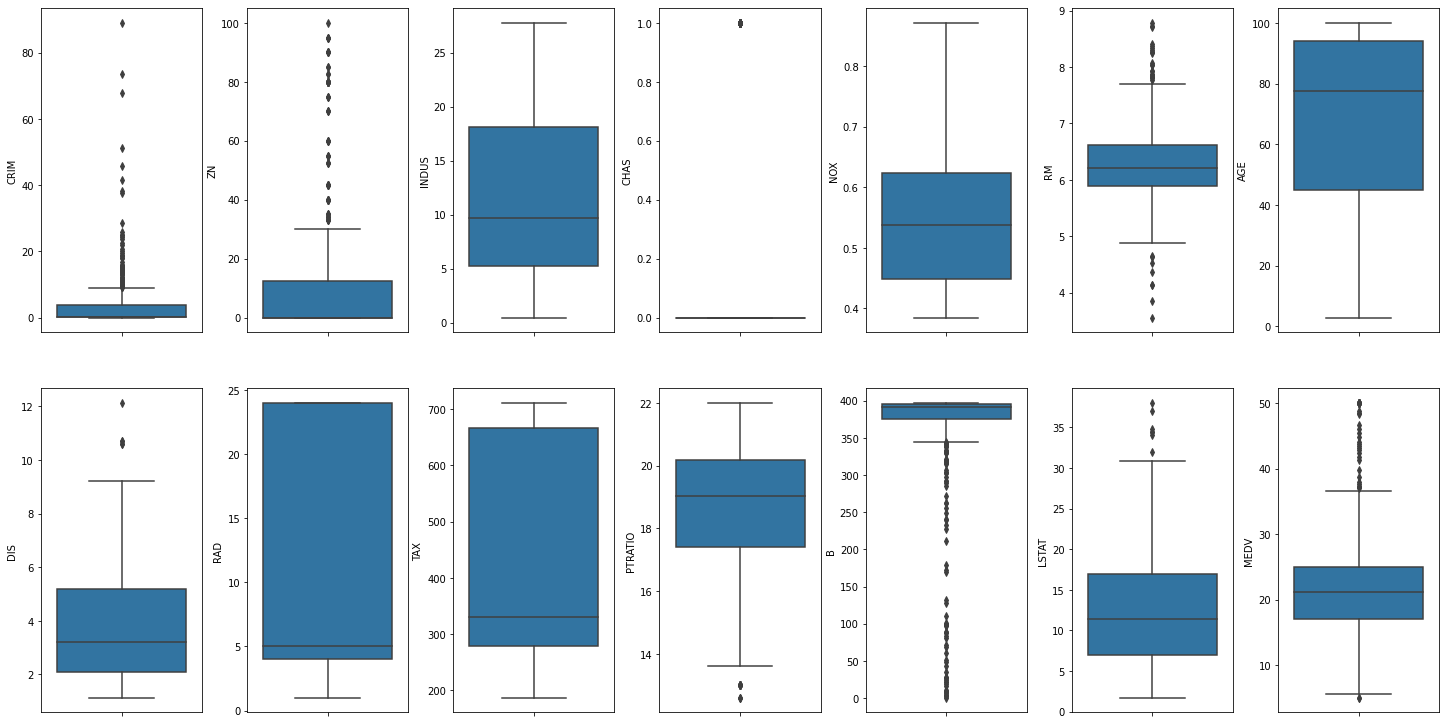

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# from scipy import stats
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()
index = 0
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

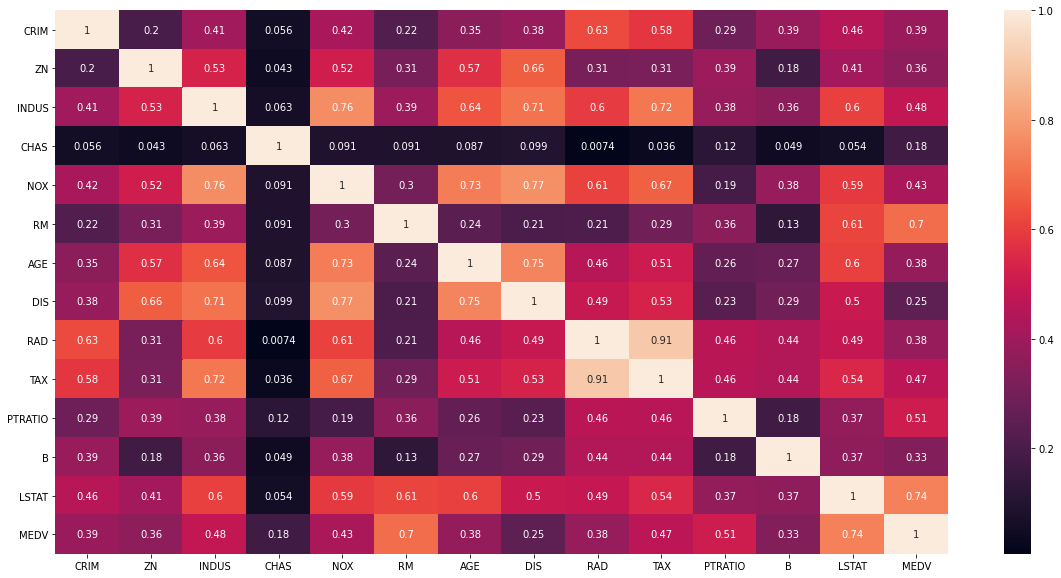

In [3]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

In [4]:
from sklearn.model_selection import train_test_split
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 42)

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dt = DecisionTreeRegressor(max_depth = 3, random_state = 1, min_samples_leaf = 1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(y_pred)
print(y_test)

[22.89949749 22.89949749 17.33939394 22.89949749 12.39264706 22.89949749
 17.33939394 17.33939394 22.89949749 22.89949749 17.33939394 17.33939394
 12.39264706 22.89949749 22.89949749 33.3        17.33939394 12.39264706
 45.56       12.39264706 22.89949749 22.89949749 17.33939394 22.89949749
 12.39264706 17.33939394 22.89949749 12.39264706 17.33939394 22.89949749
 17.33939394 22.89949749 14.1        22.89949749 17.33939394 12.39264706
 33.3        22.89949749 17.33939394 22.89949749 17.33939394 22.89949749
 45.56       22.89949749 22.89949749 12.39264706 17.33939394 22.89949749
 17.33939394 22.89949749 22.89949749 33.3        17.33939394 22.89949749
 45.56       22.89949749 12.39264706 22.89949749 22.89949749 17.33939394
 22.89949749 33.3        22.89949749 22.89949749 22.89949749 17.33939394
 12.39264706 22.89949749 22.89949749 12.39264706 22.89949749 22.89949749
 12.39264706 22.89949749 22.89949749 12.39264706 22.89949749 45.56
 12.39264706 17.33939394 22.89949749 17.33939394 22.89949

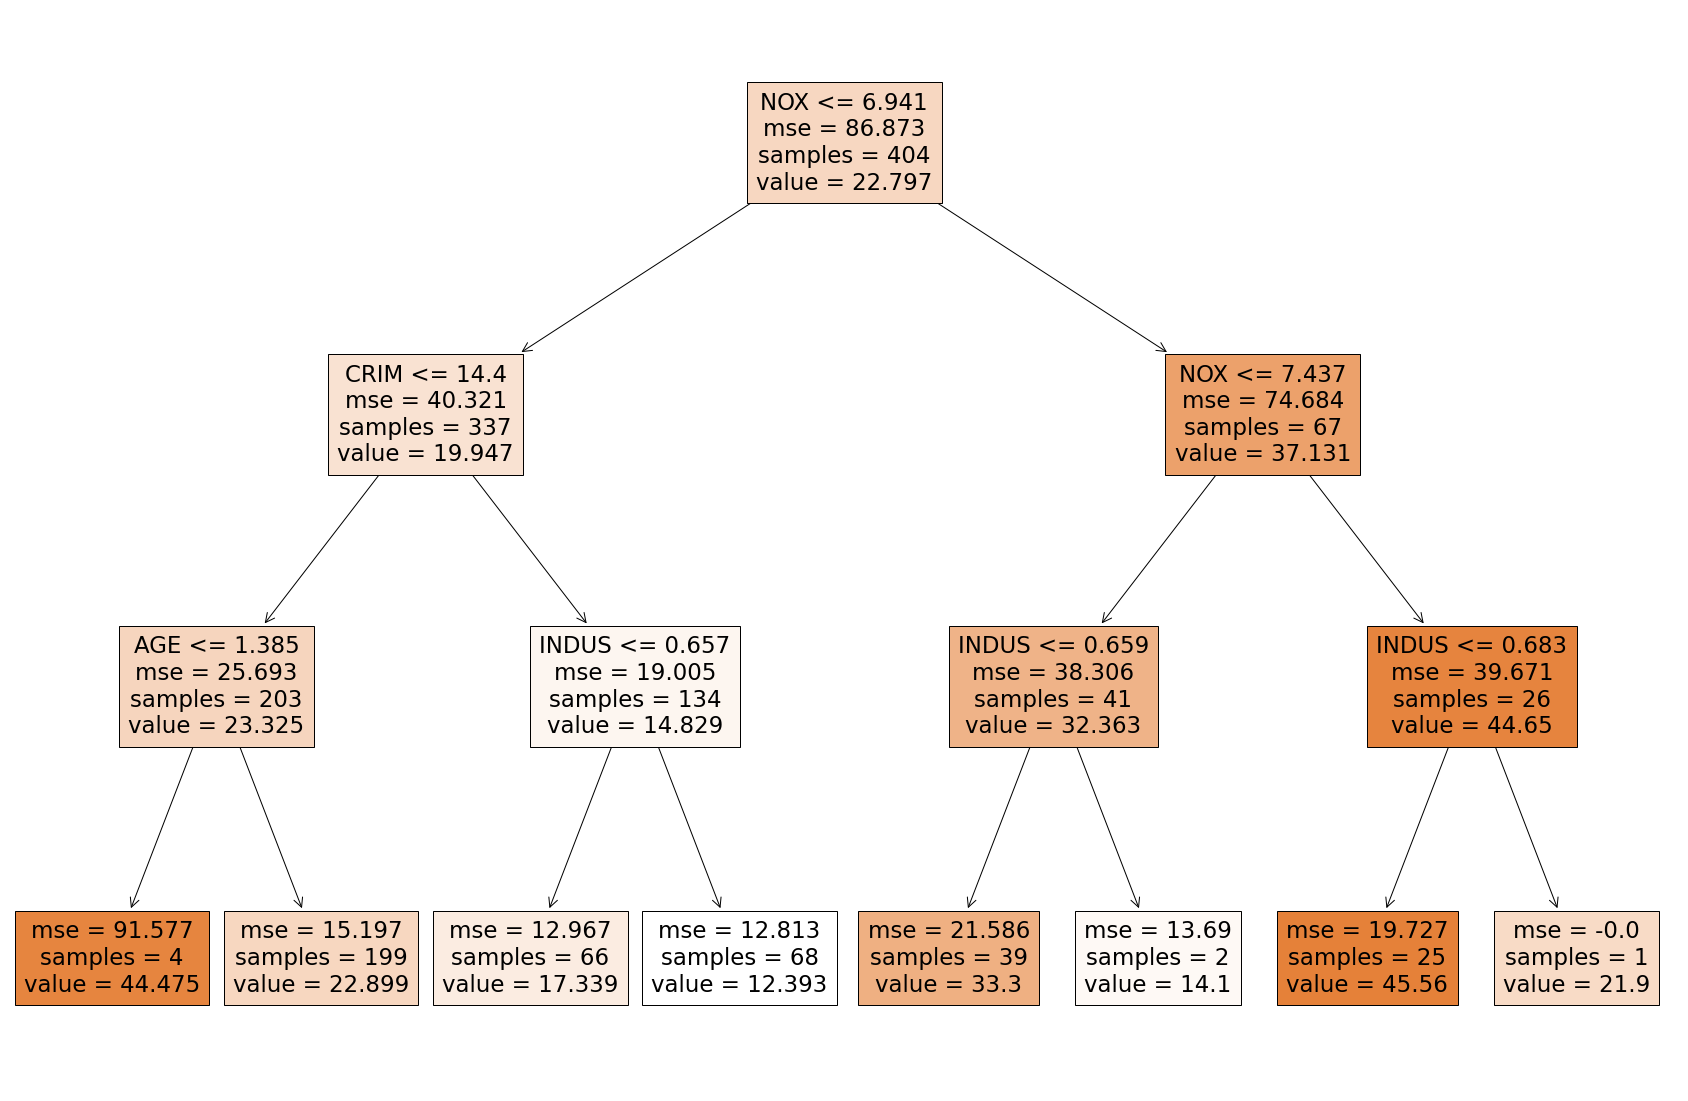

In [6]:
from matplotlib import pyplot as plt
from sklearn import tree
tree.export_text(dt)
plt.figure(figsize=(30,20))
_ = tree.plot_tree(dt, feature_names=column_names, filled=True)

In [7]:
x1 = data.loc[:, :'LSTAT']
y1 = data['MEDV']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 1)
dtr = DecisionTreeRegressor(max_depth = 3, random_state = 1, min_samples_leaf = 42)
dtr.fit(x1_train, y1_train)
y1_pred = dtr.predict(x1_test)
mse1 = mean_squared_error(y1_test, y1_pred)
print('Mean Squared Error before : ', mse1)
print('Mean Squared Error after : ', mse)
mse_before = mse1
mse_after = mse

Mean Squared Error before :  22.993016621506055
Mean Squared Error after :  13.61039129166802


In [8]:
#For prediction of a single sample: 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'
#                                      13  ,   3    ,   5  ,    11    ,  6  ,  10  ,   8  ,   7
print(dt.predict([[5, 2.31, 0.538, 15.3, 6.575, 296.0, 4.0900, 65.2]]))

[22.89949749]
